# Assigment 4: Data Analysis and Visualization

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

The data you will work with was taken from [Alaskan vegetation plots](https://daac.ornl.gov/ABOVE/guides/Arrigetch_Peaks_Veg_Plots.html) from 1978-1981. The data set is in the `data/` subdirectory in this repo in two .csv files containing information about research plots and the plant species covering the plots. **Please read the descriptions for the data, as they will help you answer the questions.** 

**Table 1: Data files**
| Data File Name |	Description |
| --- | --- |
| Arrigetch_Peaks_Environmental_Data.csv| Environmental characterization data for Arrigetch Peaks research plots |
| Arrigetch_Peaks_Species_Data.csv | Species cover data for Arrigetch Peaks research plots|

**Table 2. Arrigetch_Peaks_Environmental_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| PLANT_COMMUNITY_NAME	|  |	Primary vegetation types |
| ELEVATION |	m	| Elevation of the plots |
| ASPECT	| deg	| Aspect of the plots |
| SLOPE	| deg	| Slope of the plots |
| COVER_LITTER_LAYER	| % |	Percentage of litter layer cover in the plot |
|COVER_OPEN_WATER	| % | 	Percentage of open water cover in the plot |
| COVER_ROCK	| % |	Percentage of rock cover in the plot |
| COVER_CRUST	| % |	Percentage of crust cover in the plot |
| COVER_BARE_SOIL	| % |	Percentage of bare soil cover in the plot|
| REMARKS	 |  |	Field notes |

**Table 3. Arrigetch_Peaks_Species_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| species name | | data values are Species Cover Classes: where r (rare), + (common, but less than 1% cover), 1 (1-5 percent), 2 (6 to 25%), 3 (25 to 50%), 4 (51 to 75%), 5 (76 to 100%). |

## Question 1: Pandas (15 pt)

Load the two data sets into Python with Pandas. Name the environmental data frame `env`, and the species data frame `species`. Display the first few rows of each data frame. What are the dimensions of the two data frames? (2 pt)


Replace all values in both data frames that are `-9999` with `np.NaN`. (1 pt)

Print how many unique plant community names there are. (1 pt)

Print summary statistics for all numerical columns in `env`, excluding `"TURBOVEG_PLOT_NUMBER"`. (2 pt)

Merge the two data frames together by the column `TURBO_PLOT_NUMBER`. (1 pt)

How many rows in the merged data frame contain missing data? (1 pt)

Which species was present in the most plots? (3 pt)

For all rows in `species`, calculate the sum of all the columns (excluding `"TURBOVEG_PLOT_NUMBER"`) for each row. Add this sum as a new column called `"totals"`. (2 pt)

Read the description included above for the `species` data frame. Are there any inconsistencies between the description and the data? Explain. If there are inconsistences, what would you do to correct them? (2 pt)

In [87]:
import pandas as pd
import numpy as np

# Load datasets
env = pd.read_csv("/Users/jessebecklevisohn/Documents/GitHub/assignment-4/data/Arrigetch_Peaks_Environmental_Data.csv")
species = pd.read_csv("/Users/jessebecklevisohn/Documents/GitHub/assignment-4/data/Arrigetch_Peaks_Species_Data.csv")

# Replace -9999 with NaN
env.replace(-9999., np.NaN)
species.replace(-9999, np.NaN)

# Unique plant community names
print(len(pd.unique(env["PLANT_COMMUNITY_NAME"])))

# Summary Stats for numerical colomns in env
num_cols = ["ELEVATION", "ASPECT","SLOPE", "COVER_LITTER_LAYER", "COVER_OPEN_WATER", "COVER_ROCK", "COVER_CRUST", "COVER_BARE_SOIL"]
env_num = env[num_cols]
env_num.describe()

# Merge data frames
merged_df = pd.merge(env, species, left_on='TURBOVEG_PLOT_NUMBER', right_on='TURBOVEG_PLOT_NUMBER')

# Rows with missing data
missing_rows = len(merged_df.isnull())

# Most common species
most_common_species = 0
most_common_species_name = ""
for col in species.columns:
    if col != "TURBOVEG_PLOT_NUMBER": 
        spec_num = len(species.loc[species[col] > 0, :]) 
        if spec_num > most_common_species:
            most_common_species = spec_num
            most_common_species_name = col

print(most_common_species_name)

# Sum of Species Columns
new_col = [np.sum(species.loc[row, :]) - species.loc[row, "TURBOVEG_PLOT_NUMBER"] for row in range(len(species))]
species["totals"] = new_col


51
Cetraria islandica


Read the description included above for the `species` data frame. Are there any inconsistencies between the description and the data? Explain. If there are inconsistences, what would you do to correct them? (2 pt)

There are inconsistencies because the description says that "data values are Species Cover Classes: where r (rare), + (common, but less than 1% cover), 1 (1-5 percent), 2 (6 to 25%), 3 (25 to 50%), 4 (51 to 75%), 5 (76 to 100%)." However, the data values are all numbers and some of the data are fractions are greater than 5. In order to correct these inconsistencies, I would need to know what each of the values in the dataset are actually supposed to be. One approach without more information is to use .replace on the rows that have any value >= 5 and replace those values with 5, the rows with values between 0 and 1 and replace those valus with "+", and the rows with values that are 0 or smaller and replace it with "r". 

## Question 2: Plotting (15 pt)

Make a figure showing the relationship between elevation and cover rock percentage. Is there a positive relationship, negative relationship, or no relationship between the two variables? (3 pt)

Make a figure showing the distribution of the `"totals"` column you created in the `species` data frame. Print summary statistics for this column, as well. (3 pt)

Create a subset of `env` containing rows with the plant community names `"Caricetum scirpoideae-rupestris"`,`"Pedicularo kanei-Caricetum glacialis"`, and `"Saxifrago tricuspidatae-Artemisietum alaskanae"`. (2 pt)

Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities? (4 pt)

For all figures, label your axes descriptively with units. If necessary, create legends. Make your figures large enough to be easily readable, and **make sure that no text is overlapping**. Save all figures, and make sure to commit them (3 pt).




<function matplotlib.pyplot.show(close=None, block=None)>

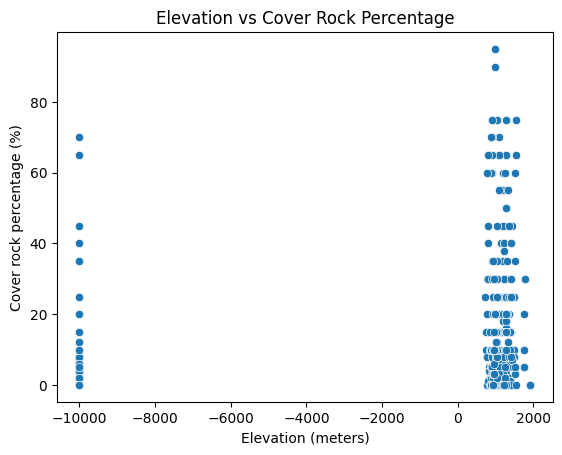

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# figure showing the relationship between elevation and cover rock pecentage
fig1 = sns.scatterplot(data=env, x="ELEVATION", y="COVER_ROCK")
fig1.set(xlabel="Elevation (meters)", ylabel="Cover rock percentage (%)", title="Elevation vs Cover Rock Percentage")
plt.show



There is no relaltionship between the two variables.

count    439.000000
mean     144.146469
std       74.729961
min       10.000000
25%       87.000000
50%      132.000000
75%      188.250000
max      380.500000
Name: totals, dtype: float64

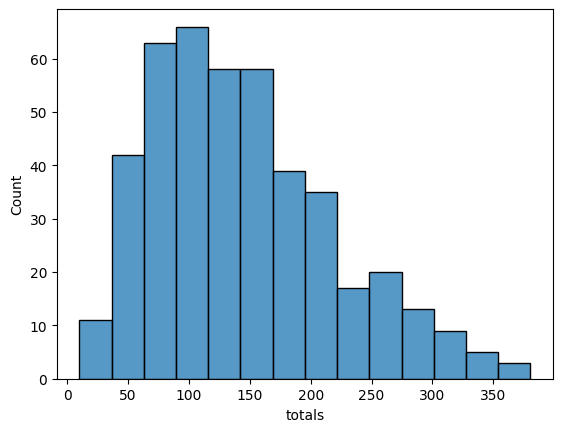

In [89]:
# Summary stats and a figure which show the distribution of the totals column
sns.histplot(data=species["totals"])
plt.show

species['totals'].describe()

In [90]:
#  Subset by rows
env_2 = env.loc[(env['PLANT_COMMUNITY_NAME'] == "Caricetum scirpoideae-rupestris") | 
        (env['PLANT_COMMUNITY_NAME'] == "Pedicularo kanei-Caricetum glacialis") | 
        (env['PLANT_COMMUNITY_NAME'] == "Saxifrago tricuspidatae-Artemisietum alaskanae"), :]

Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities? (4 pt)

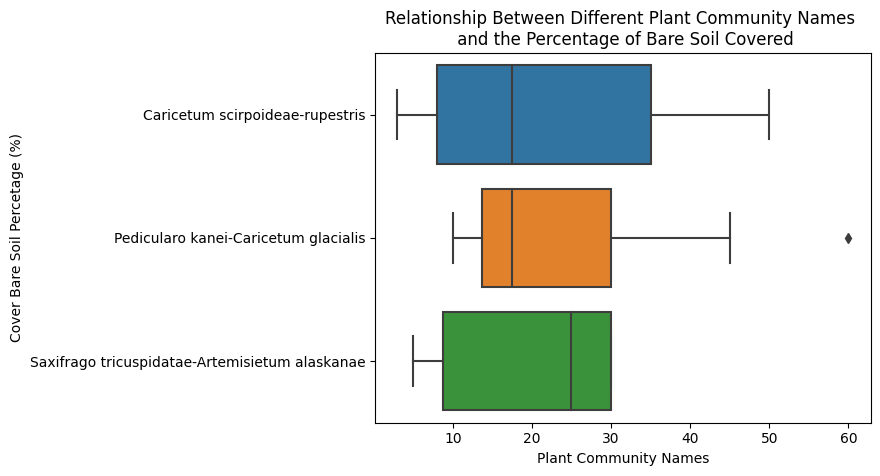

In [92]:
fig2 = sns.boxplot(data=env_2, y='PLANT_COMMUNITY_NAME', x="COVER_BARE_SOIL")
fig2.set(xlabel="Plant Community Names", ylabel="Cover Bare Soil Percetage (%)", title="Relationship Between Different Plant Community Names \n and the Percentage of Bare Soil Covered" )
plt.show()

The 25th to 75th percentile of the cover bare soil percentage of the three species are all pretty similar. Saxifrago tricuspidatae-Artemisietum alaskanae has the highest median value of the three species while the median of the other two species are almost exactly the same. Saxifrago tricuspidatae-Artemisietum alaskanae also does not have as large of a spread as the other two species. 